# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Load Dataset

In [2]:
dataset = pd.read_csv("../data/Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values  # Annual Income & Spending Score

# Hierarchical Clustering

## Dendrogram

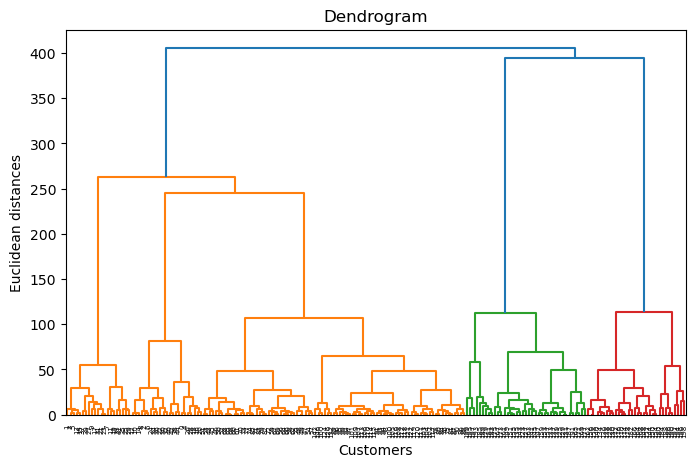

In [3]:
plt.figure(figsize=(8,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Fit Hierarchical Clustering

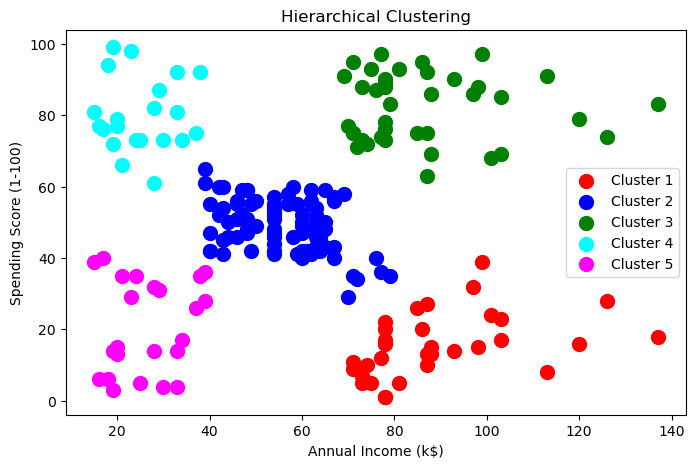

In [4]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8,5))
colors = ['red','blue','green','cyan','magenta']
for i in range(5):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# K-Means Clustering

## Elbow Method

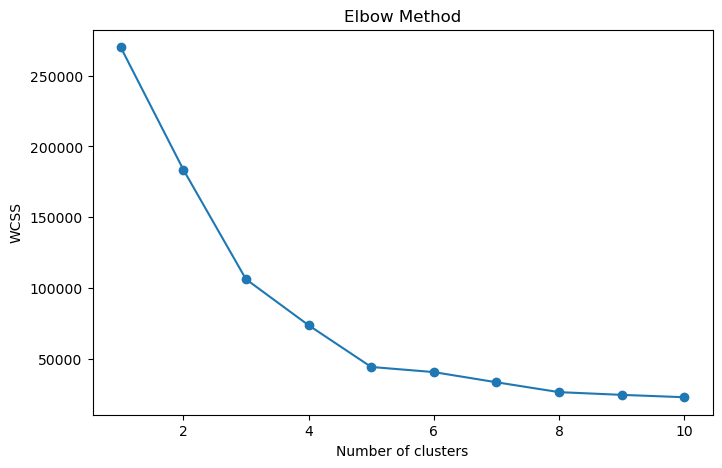

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Fit K-Means with 5 clusters

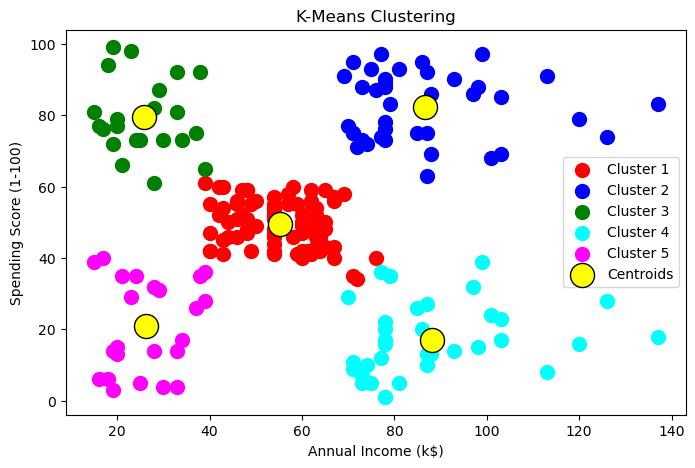

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8,5))
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids', edgecolor='black')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Cluster Statistics

In [7]:
print("Cluster Statistics (K-Means):")
for i in range(5):
    cluster_points = X[y_kmeans == i]
    print(f"Cluster {i+1}:")
    print(f"  Number of customers: {len(cluster_points)}")
    print(f"  Mean Income: {cluster_points[:,0].mean():.2f}")
    print(f"  Mean Spending Score: {cluster_points[:,1].mean():.2f}\n")

Cluster Statistics (K-Means):
Cluster 1:
  Number of customers: 81
  Mean Income: 55.30
  Mean Spending Score: 49.52

Cluster 2:
  Number of customers: 39
  Mean Income: 86.54
  Mean Spending Score: 82.13

Cluster 3:
  Number of customers: 22
  Mean Income: 25.73
  Mean Spending Score: 79.36

Cluster 4:
  Number of customers: 35
  Mean Income: 88.20
  Mean Spending Score: 17.11

Cluster 5:
  Number of customers: 23
  Mean Income: 26.30
  Mean Spending Score: 20.91



# Observations

- Cluster 1: Low income, low spending → Budget-conscious customers
- Cluster 2: High income, low spending → Potential savers
- Cluster 3: Medium income, medium spending → Average customers
- Cluster 4: Low income, high spending → Carefree spenders
- Cluster 5: High income, high spending → Premium customers

